In [2]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
import numpy as np
import matplotlib.pyplot as plt

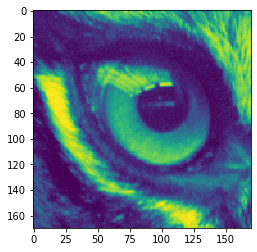

In [79]:
%matplotlib inline
img = 256-plt.imread('data/eyeofthetiger.jpg')
#img = 256-plt.imread('data/ramp.jpg')[:,:,0]
#img = np.ones([10,10])
#M = 200
#x = np.linspace(-0.5,0.5,M,endpoint=False)
#xg = np.kron(np.ones(M),x).reshape(M,M)
#img = 1-np.sqrt(xg**2+(xg.transpose())**2)
#M = 100
#x=np.append(np.append(np.zeros(M),np.ones(2*M)),np.zeros(M))
#img = np.kron(x,x).reshape(4*M,4*M)
img_N_half = int(img.shape[0]/2)

M = 2*img_N_half
x = np.linspace(-0.5,0.5,M,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],-x2.ravel()[:]]).transpose()
mu = img[:]
plt.imshow(256-mu.reshape(M,M))
#plt.imshow(1-mu.reshape(M,M))

nfft2d = nfft.NFFT2D(M**2,2*img_N_half,2*img_N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/M**2
nfft2d.adjoint()
mu_hat = np.zeros([2*img_N_half,2*img_N_half],dtype=np.complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[img_N_half,img_N_half]
#plt.imshow(np.real(mu_hat[:,:]))

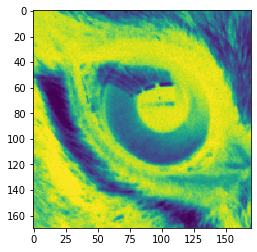

In [80]:
nfft2d.f_hat = mu_hat
nfft2d.trafo()
plt.imshow(np.real(nfft2d.f.reshape(M,M)))
#plt.imshow(np.log(np.abs(np.real(mu_hat[:,:]))))

In [81]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
m = 200
points.coords = 0.3*(np.random.rand(m,2)-0.5)
#points.coords = np.zeros([m,2])
t = np.linspace(0,2*np.pi,m,endpoint=False)
points.coords[:,0] = 0.3*np.sin(t)+0.1*np.cos(t)
points.coords[:,1] = 0.2*np.cos(t)#-0.3
#points.coords[:,0] = .5*np.sin(t)-0.5
#points.coords[:,1] = 0.2*np.cos(t)
#points.coords[:,0] = 0.2*np.sin(t)
#points.coords[:,1] = (t-np.pi)/2/np.pi
#points.coords[:,0] =1*np.sin(t)
#points.coords[:,1] =0.75*np.sin(t+0.1)
#points.coords[:,0] = 2*(t/(2*np.pi)-0.5)
#points.coords[:,1] = (t/(2*np.pi))-0.5
#points.coords = np.loadtxt('.txt')
points_new = lorm.manif.ManifoldPointArray(e2)
#points.coords = np.loadtxt('3design_2dtorus.txt')

In [568]:
points.coords = np.loadtxt('T128_L8.txt')[::1,:]

In [175]:
N_half = 128
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_curveling_2d.plan(m,N,0.5,2,2)
#for i in range(1,N):
#    for j in range(1,N):
#        norm_squared = (i-N/2)**2+(j-N/2)**2
        #energy._lambda_hat[i,j] = 1./(np.power(1+norm_squared,3/2))
        #energy._lambda_hat[i,j] = np.exp(-0.05*norm_squared)
        #energy._lambda_hat[i,j] = 1./(np.power(1+(i-N/2)**2,3/2))/(np.power(1+(j-N/2)**2,3/2))
#        energy._lambda_hat[i,j] = 1
#print(energy._lambda_hat)
if img_N_half >= N_half:
    energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
else:
    energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
#points_new.coords = np.zeros([m,2])
m

25600

<IPython.core.display.Javascript object>


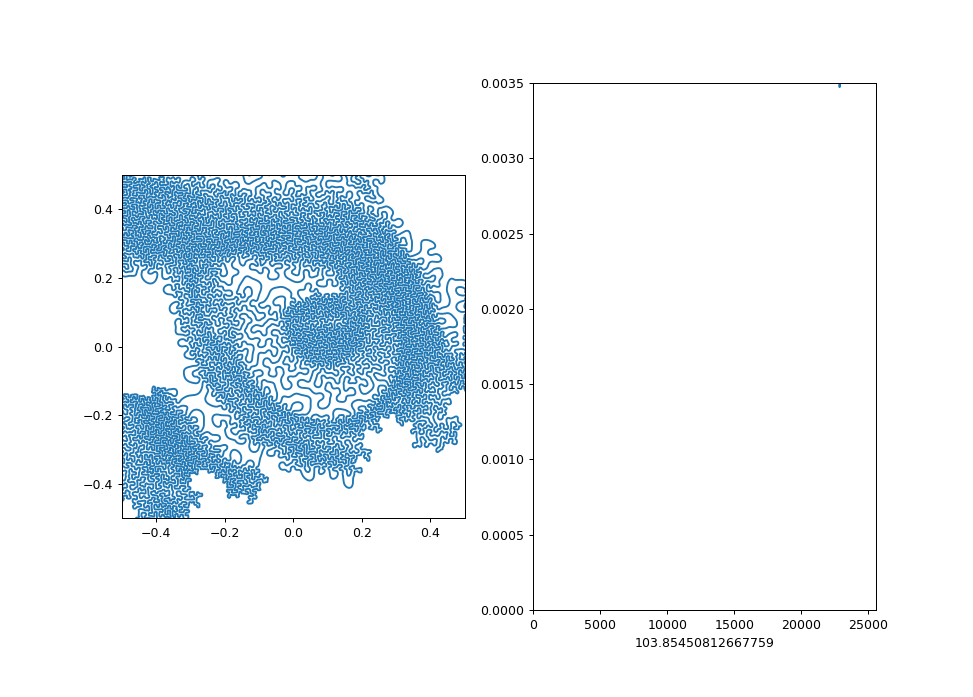

In [176]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(121)
#ax.axis(np.array([-0.28,-0.26,0.26,0.28]))
#ax.axis(np.array([0.21,0.24,-0.44,-0.42]))
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points.coords[:,0],points.coords[:,1])#,marker='*',markersize=2)
ax.add_line(line)
bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,0.0035]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points.coords))
bx.add_line(distance)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    distance.set_ydata(energy._eval_lengths(p.coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.coords)))
    fig.canvas.draw()
    return


In [194]:
#energy._alpha =.00000010
energy._T =100#np.sqrt(m)/2#15#3.030#
energy._alpha = 100/energy._T**5#2**(-5/2*9)/10
energy._p = 2
#method = lorm.optim.SteepestDescentMethod(max_iter=40)
method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
method.listener = update_points
#points_new.coords[:] = points.coords[:]
for i in range(1):
    points_new = method.run(energy,points_new)

Initial value: f[0] = 7.8722159015606e-06
f[1] = 5.2802333585268595e-06
f[2] = 4.954827794484436e-06
f[3] = 4.5537769991725936e-06
f[4] = 4.147437663210044e-06
f[5] = 3.8086658468369846e-06
f[6] = 3.551372959662646e-06
f[7] = 3.3392037345263267e-06
f[8] = 3.174615136806144e-06
f[9] = 3.042804509126053e-06
f[10] = 2.935519347149227e-06
f[11] = 2.8523360799510853e-06
f[12] = 2.7893657857230305e-06
f[13] = 2.7413228064553012e-06
f[14] = 2.7045519627598376e-06
f[15] = 2.675402926630643e-06
f[16] = 2.6518705311839124e-06
f[17] = 2.631845933150991e-06
f[18] = 2.6135346987819185e-06
f[19] = 2.5969313199579497e-06
f[20] = 2.5808403327658466e-06
f[21] = 2.5659500484757887e-06
f[22] = 2.5518754103087325e-06
f[23] = 2.5384787921393264e-06
f[24] = 2.525695080827046e-06
f[25] = 2.5136703708620467e-06
f[26] = 2.5026389169291288e-06
f[27] = 2.492376400790027e-06
f[28] = 2.4825170072835285e-06
f[29] = 2.473116607638579e-06
f[30] = 2.464106663780406e-06
f[31] = 2.4553454109850064e-06
f[32] = 2.44684945

In [192]:
np.sum((m*energy._eval_lengths(points_new.coords)-energy._T)<0)

69

In [53]:
0.1*(2)**(-5/2)

0.01767766952966369

In [91]:
np.savetxt("temp.txt",points_new.coords)

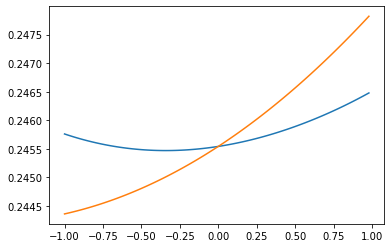

In [9]:
%matplotlib inline
v=energy.grad(points_new)
v.coords *= 1
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)

In [483]:
points.coords = points_new.coords
energy._alpha = 0
print(energy.f(points_new))#,energy_fine.f(points_new))

0.0005978288004525027


In [167]:
N_half = 1000
N = 2*N_half
energy_fine = disc.energy_curveling_2d.plan(m,N,0,2)
#for i in range(1,N):
#    for j in range(1,N):
#        norm_squared = (i-N/2)**2+(j-N/2)**2
#        energy._lambda_hat[i,j] = 1./(np.power(1+norm_squared,5/2))
        #energy._lambda_hat[i,j] = 1./(np.power(1+(i-N/2)**2,3/2))/(np.power(1+(j-N/2)**2,3/2))
#print(energy._lambda_hat)
if img_N_half >= N_half:
    energy_fine._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
else:
    energy_fine._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
energy_fine.f(points_new)

0.04451692052767634

In [165]:
#points_new.coords = temp
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

In [305]:
points.coords = points_new.coords[::2,:]

In [65]:
m2 = m-12-5-13-4
temp = np.ones([m-12-5-13-4,2])
temp[0:477,:] = points_new.coords[0:477,:]
temp[477:769-12,:] = points_new.coords[489:769,:]
temp[769-12:1276-12-5,:] = points_new.coords[774:1276]
temp[1276-12-5:1569-12-5-13,:] = points_new.coords[1289:1569]
temp[1569-12-5-13:m-4,:] = points_new.coords[1573:m]
plt.plot(temp)
temp2 = np.ones([m,2])
temp2[:]=points_new.coords[:]

ValueError: could not broadcast input array from shape (26,2) into shape (9,2)

In [962]:
(1/100)**200

0.0

In [653]:
#coords = np.loadtxt('ramp_L17_p2_M6400.txt')
#print(np.sum(energy._eval_lengths(points_new.coords)))
#print(np.sum(energy._eval_lengths(coords.reshape(6400,2))))

In [1169]:
#np.savetxt('eyeofthetiger_M256000_a10e9.txt',points_new.coords[:])
#np.savetxt('ramp_L17_p1_M6400.txt',points_new.coords[:])
#np.savetxt('ramp_a10e3_p2_M400.txt',points_new.coords[:])
#np.savetxt('design_t3_d2.txt',points_new.coords[:])
#np.savetxt('3design_2dtorus.txt',points_new.coords[:])
#np.savetxt('peak_2.txt',points_new.coords[:])

In [675]:
#Lebesgue measure alpha=0.001, N=60 (N=50 is ok), p=2 (higher orders p lead to similar curves):
# m=200, start with circle, err:0.013483
# m=400, start with result from above, err:0.012651
# m=800, start with result from above, err:0.012489
# m=1600, start with result from above, err:0.012494

#Lebesgue measure (lower bound on number and polynomial degree for reasonable approximation)
#alpha=0.01, m=60
#alpha=0.001, m=200, N=30
#alhpa=0.0001, m=600, 
#alhpa=0.00001, m=2000, N=100
#alpha=0.000001, m=6000
#alpha=0.0000001, m=20000, N=300

#for computing nice reasonable long curves: 
# algorithmically decrease alpha and increase the number of points accordingly, increase p further for better contrast

In [438]:
[[0.01/np.power(10,1./2)**i,200*2**(i-2),30*np.ceil(np.power(10,1/8)**(i-2))] for i in range(11)]

[[0.01, 50.0, 30.0],
 [0.0031622776601683794, 100.0, 30.0],
 [0.0009999999999999998, 200, 30.0],
 [0.0003162277660168379, 400, 60.0],
 [9.999999999999998e-05, 800, 60.0],
 [3.162277660168379e-05, 1600, 90.0],
 [9.999999999999997e-06, 3200, 120.0],
 [3.162277660168378e-06, 6400, 150.0],
 [9.999999999999995e-07, 12800, 180.0],
 [3.1622776601683776e-07, 25600, 240.0],
 [9.999999999999994e-08, 51200, 300.0]]

In [60]:
alpha = 0.001
points_new.coords = np.loadtxt("peak_1.txt")
table =np.zeros((11,6))
for i in range(11):
    #alpha = 0.01/np.power(10,1./2)**i #s=1.5
    alpha = 0.001/np.power(10,1./2)**(2.5/1.5*i) #s=2.5
    N_half = int(30*np.ceil(np.power(10,1/8)**(i-2)))
    N=2*N_half
    m = points_new.coords.shape[0]
    energy = disc.energy_curveling_2d.plan(m,N,alpha,2)   
    if img_N_half >= N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
    else:
        energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
    for k in range(1,N):
        for l in range(1,N):
            norm_squared = (k-N/2)**2+(l-N/2)**2
            energy._lambda_hat[k,l] = 1./(np.power(1+norm_squared,5/2))

    method = lorm.optim.ConjugateGradientMethod(max_iter=200)#,tol_grad=1e-14)
    #method.listener = update_points
    print(i)
    for its in range(3):
        points_new = method.run(energy,points_new)
    np.savetxt("peak_i{}_s2.5.txt".format(i),points_new.coords)
    energy._alpha = 0
    table[i,1] = energy.f(points_new)
  
    tempc = points_new.coords
    m2 = len(tempc)
    temp = np.zeros([2*m2,2])
    for j in range(m2):
        temp[2*j,:] = tempc[j,:]
    for j in range(m2-1):
        temp[2*j+1,:] = (tempc[j,:]+tempc[j+1,:])/2
    temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2
        
    energy = disc.energy_curveling_2d.plan(2*m,3*N,alpha,2)
    if img_N_half >= 3*N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-3*N_half:img_N_half+3*N_half,img_N_half-3*N_half:img_N_half+3*N_half]
    else:
        energy._mu_hat[3*N_half-img_N_half:3*N_half+img_N_half,3*N_half-img_N_half:3*N_half+img_N_half] = mu_hat[:]
    for k in range(1,3*N):
        for l in range(1,3*N):
            norm_squared = (k-3*N/2)**2+(l-3*N/2)**2
            energy._lambda_hat[k,l] = 1./(np.power(1+norm_squared,5/2))

    method = lorm.optim.ConjugateGradientMethod(max_iter=400)#,tol_grad=1e-14)
    points_refine = lorm.manif.ManifoldPointArray(e2)
    points_refine.coords = temp
    points_refine = method.run(energy,points_refine)
    table[i,0] = np.sum(energy._eval_lengths(points_refine.coords))
    energy._alpha = 0
    table[i,2] = energy.f(points_refine)
    table[i,3] = alpha
    table[i,4] = m
    table[i,5] = N_half
    
    if i>=2:
        points_new.coords = points_refine.coords
   

0
Initial value: f[0] = 0.005926412525238437
f[1] = 0.005903648112546993
f[2] = 0.005890946387256512
f[3] = 0.005885560387100074
f[4] = 0.00588147129539786
f[5] = 0.005876411045567626
f[6] = 0.0058741920189816525
f[7] = 0.005869844519395331
f[8] = 0.005867685864165783
f[9] = 0.005863953550115062
f[10] = 0.005861725122294061
f[11] = 0.005859906557841887
f[12] = 0.00585886899760437
f[13] = 0.005858146502296681
f[14] = 0.005857609557934861
f[15] = 0.005857020196343123
f[16] = 0.005856414753715362
f[17] = 0.00585562129318001
f[18] = 0.005854637964363543
f[19] = 0.005853742280038786
f[20] = 0.005852936989398834
f[21] = 0.005851642368813512
f[22] = 0.005850991700534705
f[23] = 0.0058500901431964075
f[24] = 0.005849357502556303
f[25] = 0.005848697250216135
f[26] = 0.00584809333427861
f[27] = 0.0058476135439434
f[28] = 0.005847138990927236
f[29] = 0.005846714152302927
f[30] = 0.005846489516221876
f[31] = 0.005846299643230412
f[32] = 0.005846122970406377
f[33] = 0.005845996624368418
f[34] = 0.0

f[89] = 0.0057735912137633575
f[90] = 0.005773555795306154
f[91] = 0.005773516739617534
f[92] = 0.00577348069729937
f[93] = 0.005773448077697372
f[94] = 0.005773422879975636
f[95] = 0.005773400322077099
f[96] = 0.005773380283067733
f[97] = 0.005773360715366096
f[98] = 0.005773341107526579
f[99] = 0.0057733231462617635
f[100] = 0.005773302811539515
f[101] = 0.005773282274037091
f[102] = 0.005773260118018046
f[103] = 0.005773238755875448
f[104] = 0.005773217981237433
f[105] = 0.005773192413728619
f[106] = 0.005773166461387338
f[107] = 0.005773148788534702
f[108] = 0.005773126131284809
f[109] = 0.005773105924189157
f[110] = 0.005773089412115583
f[111] = 0.005773068199749044
f[112] = 0.005773045342922707
f[113] = 0.005773017739456578
f[114] = 0.005772984477054202
f[115] = 0.005772953720410075
f[116] = 0.005772925655558961
f[117] = 0.005772896555624868
f[118] = 0.005772869767584562
f[119] = 0.005772843932765492
f[120] = 0.0057728096687058895
f[121] = 0.005772771805531913
f[122] = 0.00577271

f[164] = 0.005770076430639875
f[165] = 0.005770076427083835
f[166] = 0.0057700764239508665
f[167] = 0.005770076421990709
f[168] = 0.0057700764205772265
f[169] = 0.005770076419169165
f[170] = 0.005770076417273764
f[171] = 0.005770076415203682
f[172] = 0.005770076412613555
f[173] = 0.0057700764093634675
f[174] = 0.005770076404219221
f[175] = 0.005770076395739891
f[176] = 0.0057700763832491155
f[177] = 0.005770076365718635
f[178] = 0.005770076348031863
f[179] = 0.005770076333445993
f[180] = 0.005770076322370729
f[181] = 0.005770076314224542
f[182] = 0.005770076307396227
f[183] = 0.005770076300976589
f[184] = 0.00577007629476378
f[185] = 0.005770076286670787
f[186] = 0.005770076275300278
f[187] = 0.005770076263455189
f[188] = 0.005770076247287274
f[189] = 0.005770076223237825
f[190] = 0.0057700761988394925
f[191] = 0.005770076174332842
f[192] = 0.0057700761538851284
f[193] = 0.005770076128193875
f[194] = 0.005770076109635423
f[195] = 0.005770076090548991
f[196] = 0.005770076073744449
f[197

f[241] = 0.005773989665887333
f[242] = 0.005773989665472178
f[243] = 0.0057739896650700374
f[244] = 0.005773989664704029
f[245] = 0.005773989664292014
f[246] = 0.0057739896638140005
f[247] = 0.005773989663393003
f[248] = 0.005773989662901064
f[249] = 0.005773989662441269
f[250] = 0.00577398966202209
f[251] = 0.005773989661633397
f[252] = 0.005773989661358361
f[253] = 0.005773989661109698
f[254] = 0.005773989660883168
f[255] = 0.005773989660696141
f[256] = 0.005773989660521655
f[257] = 0.005773989660361272
f[258] = 0.005773989660217939
f[259] = 0.00577398966009183
f[260] = 0.0057739896599777974
f[261] = 0.0057739896598895755
f[262] = 0.005773989659817226
f[263] = 0.0057739896597499805
f[264] = 0.0057739896596819
f[265] = 0.0057739896596142645
f[266] = 0.005773989659544711
f[267] = 0.005773989659471175
f[268] = 0.005773989659414286
f[269] = 0.005773989659359466
f[270] = 0.005773989659309451
f[271] = 0.005773989659268112
f[272] = 0.00577398965922574
f[273] = 0.005773989659186896
f[274] = 

f[119] = 0.0011837544034476216
f[120] = 0.001183659224454964
f[121] = 0.001183575999471038
f[122] = 0.001183488239541723
f[123] = 0.001183406499822056
f[124] = 0.0011833291350457063
f[125] = 0.0011832536668033194
f[126] = 0.0011831502102735854
f[127] = 0.0011830756446162033
f[128] = 0.0011829825712277072
f[129] = 0.0011829158914629496
f[130] = 0.001182844257287868
f[131] = 0.001182797642076502
f[132] = 0.0011827285128297085
f[133] = 0.0011826927721684832
f[134] = 0.0011826308444081927
f[135] = 0.001182590684044141
f[136] = 0.001182528478582255
f[137] = 0.0011824898119743978
f[138] = 0.001182430280075376
f[139] = 0.001182390199404084
f[140] = 0.0011823434687633543
f[141] = 0.0011822979385638253
f[142] = 0.0011822565288912052
f[143] = 0.0011822172906396143
f[144] = 0.0011821770691663788
f[145] = 0.0011821371374061529
f[146] = 0.0011820926243039376
f[147] = 0.0011820456304181134
f[148] = 0.0011819946612740512
f[149] = 0.001181944988530805
f[150] = 0.0011818919435502837
f[151] = 0.00118182

f[196] = 0.001177059236968984
f[197] = 0.0011770454967632384
f[198] = 0.0011770353145229857
f[199] = 0.0011770198623168651
f[200] = 0.001177009486973699
Reached maximal iterations!
Initial value: f[0] = 0.001177009486973699
f[1] = 0.0011770025851811866
f[2] = 0.0011769899195272402
f[3] = 0.0011769733912214216
f[4] = 0.0011769511820339767
f[5] = 0.0011769305854890805
f[6] = 0.0011769010763457508
f[7] = 0.0011768688710164998
f[8] = 0.0011768474596195423
f[9] = 0.0011768248940208486
f[10] = 0.0011768078098190592
f[11] = 0.0011767756157974026
f[12] = 0.001176749304059522
f[13] = 0.0011767289379021485
f[14] = 0.001176711062304681
f[15] = 0.0011766924792338646
f[16] = 0.0011766622003145568
f[17] = 0.0011766398743079136
f[18] = 0.00117661764827486
f[19] = 0.0011765836164284297
f[20] = 0.00117654953561632
f[21] = 0.0011765150746687035
f[22] = 0.0011764878982029122
f[23] = 0.0011764417829193004
f[24] = 0.001176402346602176
f[25] = 0.0011763782372060311
f[26] = 0.0011763519861268642
f[27] = 0.00

f[64] = 0.0011630401388103516
f[65] = 0.0011630089877200842
f[66] = 0.0011629809696307519
f[67] = 0.001162952173700359
f[68] = 0.00116292832490637
f[69] = 0.00116290715326844
f[70] = 0.0011628872824442323
f[71] = 0.0011628675314726427
f[72] = 0.001162848611855376
f[73] = 0.0011628346719477556
f[74] = 0.0011628206662020041
f[75] = 0.0011628073396520071
f[76] = 0.001162797074414264
f[77] = 0.0011627851973040112
f[78] = 0.0011627738753643858
f[79] = 0.0011627652171320056
f[80] = 0.0011627580597347355
f[81] = 0.0011627515676511933
f[82] = 0.0011627457588928442
f[83] = 0.0011627395759146956
f[84] = 0.0011627339183352984
f[85] = 0.001162728538522103
f[86] = 0.0011627233030680033
f[87] = 0.00116271842090486
f[88] = 0.0011627138846871331
f[89] = 0.0011627097119453235
f[90] = 0.0011627052807034186
f[91] = 0.0011627005241610212
f[92] = 0.001162695807010176
f[93] = 0.001162690761030374
f[94] = 0.001162685660918401
f[95] = 0.001162679511388364
f[96] = 0.0011626719039077797
f[97] = 0.00116266406950

f[333] = 0.0011621337549304835
f[334] = 0.0011621336933373746
f[335] = 0.0011621336399450315
f[336] = 0.0011621335914173176
f[337] = 0.0011621335488983151
f[338] = 0.001162133511257193
f[339] = 0.0011621334782733613
f[340] = 0.0011621334476328402
f[341] = 0.0011621334164647601
f[342] = 0.0011621333843170717
f[343] = 0.0011621333480213057
f[344] = 0.0011621333096368492
f[345] = 0.0011621332731070384
f[346] = 0.0011621332377293315
f[347] = 0.0011621332050740878
f[348] = 0.001162133171870792
f[349] = 0.0011621331419392267
f[350] = 0.001162133109946234
f[351] = 0.0011621330768449576
f[352] = 0.0011621330490828774
f[353] = 0.0011621330221730567
f[354] = 0.0011621329950478622
f[355] = 0.0011621329692902804
f[356] = 0.0011621329453639017
f[357] = 0.0011621329207711947
f[358] = 0.00116213289697978
f[359] = 0.0011621328714911483
f[360] = 0.0011621328486200256
f[361] = 0.001162132828690752
f[362] = 0.0011621328105497681
f[363] = 0.0011621327942858732
f[364] = 0.0011621327803486695
f[365] = 0.001

f[4] = 0.00023568334140815775
f[5] = 0.00023566779485616234
f[6] = 0.00023564243063894835
f[7] = 0.00023561862767004484
f[8] = 0.0002355989574491434
f[9] = 0.00023557375278267928
f[10] = 0.00023556644985055233
f[11] = 0.00023554402848889274
f[12] = 0.00023553320648045812
f[13] = 0.0002355191931838277
f[14] = 0.00023550226232275717
f[15] = 0.00023548537491384312
f[16] = 0.00023546712772814848
f[17] = 0.0002354575207906454
f[18] = 0.00023544607314401406
f[19] = 0.00023543545580040286
f[20] = 0.00023542568195413372
f[21] = 0.0002354163370643925
f[22] = 0.0002354084553904817
f[23] = 0.00023540094891177983
f[24] = 0.00023539305035048564
f[25] = 0.00023538446709934138
f[26] = 0.00023537884681949287
f[27] = 0.00023537000709907452
f[28] = 0.00023536357006276993
f[29] = 0.0002353600020540743
f[30] = 0.00023534758408004335
f[31] = 0.0002353425654413818
f[32] = 0.0002353336303290511
f[33] = 0.00023532979347226993
f[34] = 0.00023531919501820916
f[35] = 0.00023531118019258593
f[36] = 0.000235303769

f[71] = 0.00023494868312214112
f[72] = 0.00023494858848625627
f[73] = 0.00023494840736016712
f[74] = 0.00023494823954970496
f[75] = 0.00023494813260023522
f[76] = 0.0002349479460641442
f[77] = 0.00023494781941625823
f[78] = 0.00023494768535417093
f[79] = 0.0002349475632532346
f[80] = 0.00023494731539944153
f[81] = 0.00023494701366120487
f[82] = 0.0002349469376577708
f[83] = 0.00023494675037022959
f[84] = 0.0002349465578666429
f[85] = 0.00023494643470485922
f[86] = 0.00023494635884757577
f[87] = 0.00023494616406620722
f[88] = 0.00023494599613704267
f[89] = 0.0002349458961292488
f[90] = 0.00023494567021450745
f[91] = 0.00023494558782977338
f[92] = 0.00023494532140039948
f[93] = 0.00023494513028744028
f[94] = 0.0002349450408745725
f[95] = 0.0002349448459897945
f[96] = 0.0002349447434842638
f[97] = 0.00023494457966955997
f[98] = 0.00023494443418789517
f[99] = 0.0002349442830404515
f[100] = 0.00023494400224117104
f[101] = 0.0002349439046775543
f[102] = 0.00023494355898829363
f[103] = 0.0002

f[133] = 0.00023507537369475367
f[134] = 0.00023507441281971588
f[135] = 0.00023507383820435567
f[136] = 0.000235073443576056
f[137] = 0.0002350722652243114
f[138] = 0.00023507161481041498
f[139] = 0.0002350711351215942
f[140] = 0.00023507042844617322
f[141] = 0.00023506921946752374
f[142] = 0.00023506858049710888
f[143] = 0.00023506790919329042
f[144] = 0.00023506692340556921
f[145] = 0.00023506617559565404
f[146] = 0.00023506523715806525
f[147] = 0.00023506467160442653
f[148] = 0.00023506397905756309
f[149] = 0.00023506280971312868
f[150] = 0.0002350622508056264
f[151] = 0.00023506177088728094
f[152] = 0.0002350608650009565
f[153] = 0.00023506025019144557
f[154] = 0.0002350596877332106
f[155] = 0.00023505918711483537
f[156] = 0.00023505882959355028
f[157] = 0.0002350581836010257
f[158] = 0.00023505770942879657
f[159] = 0.00023505738897250532
f[160] = 0.00023505691007289615
f[161] = 0.00023505636772693818
f[162] = 0.00023505607091460024
f[163] = 0.0002350557889712413
f[164] = 0.000235

f[395] = 0.00023494631762711453
f[396] = 0.0002349460482618246
f[397] = 0.00023494575290226678
f[398] = 0.00023494555959369825
f[399] = 0.00023494531043775276
f[400] = 0.00023494496050869914
Reached maximal iterations!
3
Initial value: f[0] = 6.636057426333047e-05
f[1] = 6.522642027488202e-05
f[2] = 6.44670116128012e-05
f[3] = 6.333076680932392e-05
f[4] = 6.2297547848887e-05
f[5] = 6.135126938584592e-05
f[6] = 6.063826284921288e-05
f[7] = 5.9644216558358106e-05
f[8] = 5.847485963261993e-05
f[9] = 5.8030754436522306e-05
f[10] = 5.682146317180746e-05
f[11] = 5.6446141122345046e-05
f[12] = 5.573504866450259e-05
f[13] = 5.5349944734018854e-05
f[14] = 5.484479474881146e-05
f[15] = 5.4567389817587594e-05
f[16] = 5.409003028473866e-05
f[17] = 5.387020732837541e-05
f[18] = 5.364067813266185e-05
f[19] = 5.323185739913423e-05
f[20] = 5.313467673412078e-05
f[21] = 5.273863709958256e-05
f[22] = 5.256697291426106e-05
f[23] = 5.2371172806703006e-05
f[24] = 5.2251641599643855e-05
f[25] = 5.2071461015

f[63] = 4.8000469112936445e-05
f[64] = 4.7998498568454164e-05
f[65] = 4.799669140497634e-05
f[66] = 4.799341186701454e-05
f[67] = 4.799003316029507e-05
f[68] = 4.798917752317348e-05
f[69] = 4.798612877229323e-05
f[70] = 4.798253098086646e-05
f[71] = 4.798100032444955e-05
f[72] = 4.797872784084313e-05
f[73] = 4.7976553120431865e-05
f[74] = 4.797245397112695e-05
f[75] = 4.796968456510714e-05
f[76] = 4.796756431233499e-05
f[77] = 4.796467861619763e-05
f[78] = 4.796105780600453e-05
f[79] = 4.795759439558656e-05
f[80] = 4.7953102129958455e-05
f[81] = 4.795036400671267e-05
f[82] = 4.794785750906907e-05
f[83] = 4.7943832996609324e-05
f[84] = 4.79406246895586e-05
f[85] = 4.793661664643141e-05
f[86] = 4.7933313846661906e-05
f[87] = 4.793106529446256e-05
f[88] = 4.7926922981110494e-05
f[89] = 4.792363226753855e-05
f[90] = 4.792088834510527e-05
f[91] = 4.791838205922757e-05
f[92] = 4.79147245502337e-05
f[93] = 4.791245150423936e-05
f[94] = 4.790746462433481e-05
f[95] = 4.790508797487131e-05
f[96]

f[129] = 4.748559938208424e-05
f[130] = 4.748520911549324e-05
f[131] = 4.7484684297669223e-05
f[132] = 4.748423893065223e-05
f[133] = 4.748387051734399e-05
f[134] = 4.748351866308386e-05
f[135] = 4.748280239523549e-05
f[136] = 4.7482557333291955e-05
f[137] = 4.7481933663802225e-05
f[138] = 4.748145436415813e-05
f[139] = 4.7481211611835004e-05
f[140] = 4.7480442897728555e-05
f[141] = 4.747992843491716e-05
f[142] = 4.747964373383872e-05
f[143] = 4.7479386993661614e-05
f[144] = 4.7478616286106344e-05
f[145] = 4.7478196486831175e-05
f[146] = 4.7477583848333835e-05
f[147] = 4.747720907139636e-05
f[148] = 4.747668940660141e-05
f[149] = 4.747600540321201e-05
f[150] = 4.7475612520172084e-05
f[151] = 4.747500215103885e-05
f[152] = 4.7474340141877975e-05
f[153] = 4.747391552388283e-05
f[154] = 4.747361687362508e-05
f[155] = 4.747262725126816e-05
f[156] = 4.7472062193066915e-05
f[157] = 4.747141129319916e-05
f[158] = 4.7470740726325686e-05
f[159] = 4.747035352782711e-05
f[160] = 4.746904889801237

f[193] = 4.740794846315094e-05
f[194] = 4.74076175105107e-05
f[195] = 4.740724510798689e-05
f[196] = 4.740678935423908e-05
f[197] = 4.7406580584806664e-05
f[198] = 4.7406183544934805e-05
f[199] = 4.7405631210484405e-05
f[200] = 4.740534465186617e-05
f[201] = 4.7405022457378755e-05
f[202] = 4.7404278545175785e-05
f[203] = 4.7404007056499606e-05
f[204] = 4.740359502043505e-05
f[205] = 4.740325403999238e-05
f[206] = 4.7402599454879925e-05
f[207] = 4.7402266555861305e-05
f[208] = 4.740175809288901e-05
f[209] = 4.740143601309479e-05
f[210] = 4.740111377858473e-05
f[211] = 4.74006433955949e-05
f[212] = 4.740045390592804e-05
f[213] = 4.739992821212613e-05
f[214] = 4.73995135630454e-05
f[215] = 4.739928616672332e-05
f[216] = 4.739896559928939e-05
f[217] = 4.7398512130512344e-05
f[218] = 4.7398215393416884e-05
f[219] = 4.739789989967574e-05
f[220] = 4.739749975173028e-05
f[221] = 4.739727982352571e-05
f[222] = 4.7396649021054366e-05
f[223] = 4.739648464474647e-05
f[224] = 4.7396083052666705e-05

f[58] = 1.0260766044444194e-05
f[59] = 1.0253806723109198e-05
f[60] = 1.0245940345628874e-05
f[61] = 1.0236274650722002e-05
f[62] = 1.0229244965225332e-05
f[63] = 1.0220486455177134e-05
f[64] = 1.021473799415659e-05
f[65] = 1.0206179099376456e-05
f[66] = 1.0195309390794347e-05
f[67] = 1.0189280207665119e-05
f[68] = 1.0185339497431563e-05
f[69] = 1.0175876231006206e-05
f[70] = 1.016877446429882e-05
f[71] = 1.0162541363334549e-05
f[72] = 1.015456161547569e-05
f[73] = 1.0149814397235534e-05
f[74] = 1.0142360843914899e-05
f[75] = 1.0131814117214154e-05
f[76] = 1.0126624203633359e-05
f[77] = 1.0120291639980218e-05
f[78] = 1.011068423884053e-05
f[79] = 1.0106974535325582e-05
f[80] = 1.0099502720997363e-05
f[81] = 1.0093752873865803e-05
f[82] = 1.0086738612966402e-05
f[83] = 1.0079126096760815e-05
f[84] = 1.0075156101073146e-05
f[85] = 1.0069226521088651e-05
f[86] = 1.0060114300592003e-05
f[87] = 1.005539948386958e-05
f[88] = 1.0052052664980256e-05
f[89] = 1.0044063684593856e-05
f[90] = 1.003

f[129] = 9.719090343051861e-06
f[130] = 9.718423418925109e-06
f[131] = 9.718043996166798e-06
f[132] = 9.717081025497217e-06
f[133] = 9.71664441189789e-06
f[134] = 9.716207872062492e-06
f[135] = 9.715573066109616e-06
f[136] = 9.71514813097345e-06
f[137] = 9.714673152880954e-06
f[138] = 9.713964503936889e-06
f[139] = 9.713447720814377e-06
f[140] = 9.71313835258435e-06
f[141] = 9.712481707994007e-06
f[142] = 9.712226585311552e-06
f[143] = 9.711599781779146e-06
f[144] = 9.710959553777029e-06
f[145] = 9.710480075643088e-06
f[146] = 9.7099165158447e-06
f[147] = 9.709260952609091e-06
f[148] = 9.708928070334273e-06
f[149] = 9.708509873490145e-06
f[150] = 9.708114059637394e-06
f[151] = 9.707631809144296e-06
f[152] = 9.706565333764385e-06
f[153] = 9.70635124389984e-06
f[154] = 9.70593265149278e-06
f[155] = 9.705274072716293e-06
f[156] = 9.704734231939913e-06
f[157] = 9.704440881404053e-06
f[158] = 9.703870561343242e-06
f[159] = 9.702866953891643e-06
f[160] = 9.702635837238409e-06
f[161] = 9.7020

f[197] = 9.642965405532436e-06
f[198] = 9.642776406684526e-06
f[199] = 9.64263130853477e-06
f[200] = 9.642574917707696e-06
Reached maximal iterations!
Initial value: f[0] = 9.721182884298836e-06
f[1] = 9.708568345455658e-06
f[2] = 9.698689076438509e-06
f[3] = 9.690014055253183e-06
f[4] = 9.679978359196045e-06
f[5] = 9.67155626014719e-06
f[6] = 9.666832682653425e-06
f[7] = 9.663675141357568e-06
f[8] = 9.662098396405764e-06
f[9] = 9.660796270695004e-06
f[10] = 9.660551083259027e-06
f[11] = 9.659959824979715e-06
f[12] = 9.659709987021318e-06
f[13] = 9.659568759380373e-06
f[14] = 9.659327270180338e-06
f[15] = 9.659252556919585e-06
f[16] = 9.659014844096677e-06
f[17] = 9.658791026537154e-06
f[18] = 9.658560385289888e-06
f[19] = 9.658490378100678e-06
f[20] = 9.65835823251896e-06
f[21] = 9.658283220779287e-06
f[22] = 9.658180344902489e-06
f[23] = 9.658072694733013e-06
f[24] = 9.657898067536436e-06
f[25] = 9.657766483811318e-06
f[26] = 9.657696887005834e-06
f[27] = 9.657613692367327e-06
f[28] 

KeyboardInterrupt: 

In [506]:
table

array([[3.68317449e+00, 3.64122051e-03, 3.64242001e-03, 5.00000000e-03,
        2.00000000e+02, 3.00000000e+01],
       [5.45206616e+00, 5.11119322e-04, 5.12838883e-04, 5.00000000e-04,
        2.00000000e+02, 3.00000000e+01],
       [7.88346668e+00, 7.56057158e-05, 7.86235631e-05, 5.00000000e-05,
        2.00000000e+02, 3.00000000e+01],
       [1.16216944e+01, 1.15608380e-05, 1.18452629e-05, 5.00000000e-06,
        4.00000000e+02, 6.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 

In [310]:
#np.savetxt("peak_approx_table_s2.5.dat",table)
np.savetxt("eye_of_the_tiger_L600.dat",points_new.coords)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


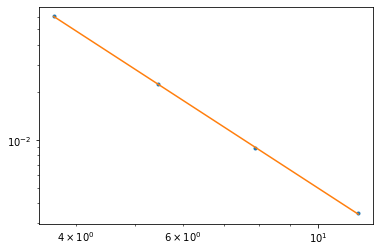

In [507]:
%matplotlib inline
plt.loglog(table[:,0],np.sqrt(table[:,2]),'.',table[:,0],1.57*table[:,0]**(-5/2))

In [57]:
0.005/np.power(10,1./2)**(2.5/1.5*4)

2.320794416806388e-06

In [50]:
0.01/np.power(10,1./2)**(3)

0.0003162277660168379